In [1]:
# #mount drive
# from google.colab import drive
# drive.mount('/content/drive')
 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Analysis


# Importing Libraries

In [3]:
data=pd.read_csv('healthcare-dataset-stroke-data.csv')
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [4]:
# The id column is not relevant
data.drop(columns=['id'],inplace=True) 
data.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


## Handling Missing Data

In [6]:
# To check how much data is missing
def draw_missing_data_table(data):
   total = data.isnull().sum().sort_values(ascending=False)
   missing = pd.DataFrame(total,columns=['total'])
   return missing
draw_missing_data_table(data)

,total
bmi,201
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
smoking_status,0


In [7]:
# Imputing the missing values with the mean
data=data.fillna(np.mean(data['bmi']))

setting palette

In [8]:
colors = ["#BAF1FF", "#FAECBF", "#BBF6CD", "#DDC6F7", "#F4BBC1",  "#BACBFF"]
customPalette = sns.set_palette(sns.color_palette(colors))

## Analysing Variables

In [9]:
# Classifying data into numerical and categorical variables.
data_numerical=data[['age','avg_glucose_level','bmi']]
data_categorical=data[['gender', 'hypertension', 'heart_disease', 'ever_married','work_type', 'Residence_type', 
                       'smoking_status', 'stroke']]

### Numerical Variable Analysis

/var/folders/lc/qy65gpf543n4sgfmlfsbg83m0000gn/T/ipykernel_4187/3634812230.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=data_numerical,shade=True,palette="bright") # Distributions


Text(0.5, 1.0, 'Kde Plots for age, avg_glucose_level and bmi')

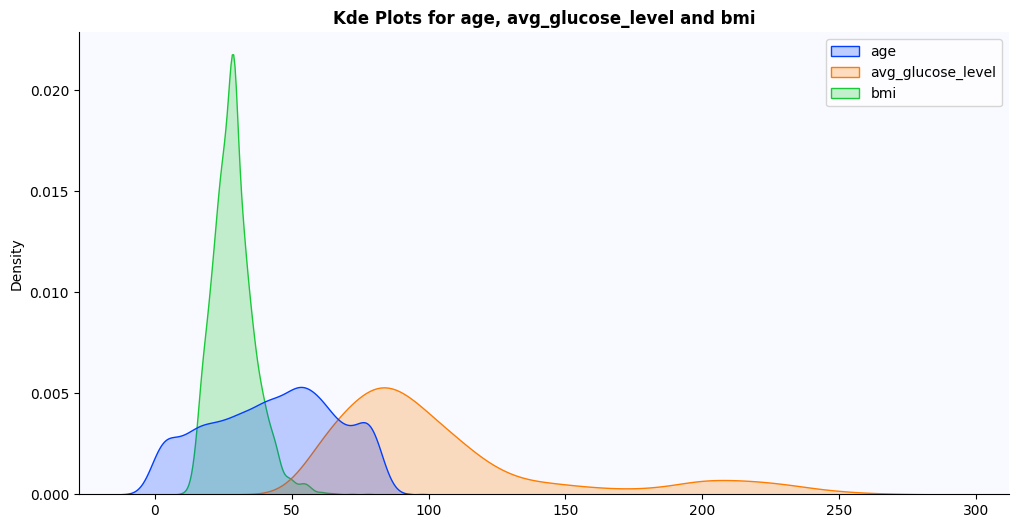

In [10]:
fig, ax = plt.subplots(figsize = (12,6))
fig.patch.set_facecolor('#ffffff')
ax.set_facecolor('#f9faff')
sns.kdeplot(data=data_numerical,shade=True,palette="bright") # Distributions
# removing spines
for i in ["top","right"]:
    ax.spines[i].set_visible(False)
plt.title('Kde Plots for age, avg_glucose_level and bmi',weight='bold')

### Analysis with stroke

/var/folders/lc/qy65gpf543n4sgfmlfsbg83m0000gn/T/ipykernel_4187/1182381745.py:17: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(ax=ax0,x=data.loc[data['stroke']==1]['age'],color='#00D7FF',label='Stroke',shade=True)
/var/folders/lc/qy65gpf543n4sgfmlfsbg83m0000gn/T/ipykernel_4187/1182381745.py:18: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(ax=ax0,x=data.loc[data['stroke']==0]['age'],color='#03ED3A',label='No Stroke',shade=True)
/var/folders/lc/qy65gpf543n4sgfmlfsbg83m0000gn/T/ipykernel_4187/1182381745.py:24: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(ax=ax2,x=data.loc[data['stroke']==1]['avg_glucose_level'],color='#0

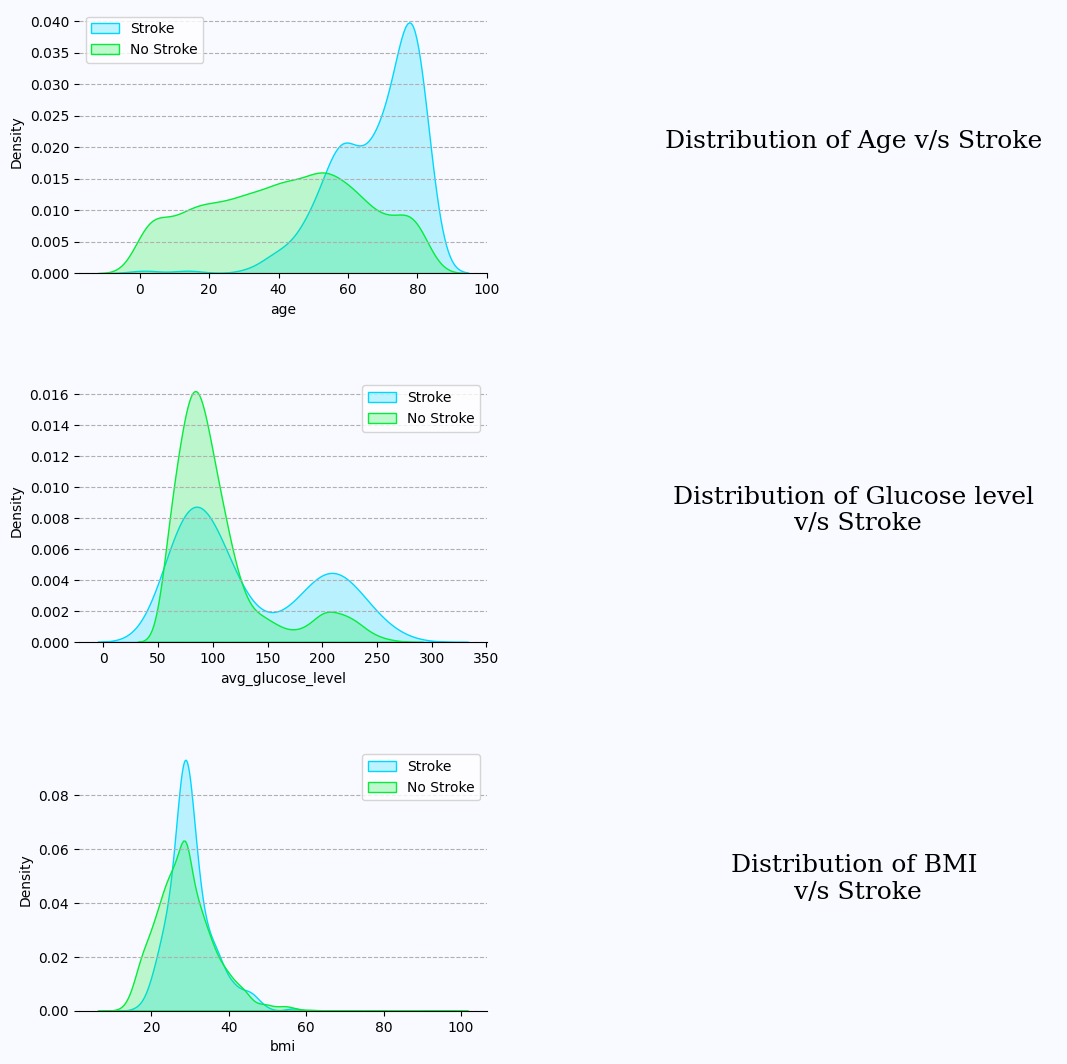

In [11]:
fig = plt.figure(figsize=(20,13))
gs = fig.add_gridspec(3,3)
gs.update(wspace=0.4, hspace=0.4)
# adding figures
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[1,0])
ax3 = fig.add_subplot(gs[1,1])
ax4 = fig.add_subplot(gs[2,0])
ax5 = fig.add_subplot(gs[2,1])
axes=[ax0,ax1,ax2,ax3,ax4,ax5]
background_color = '#f9faff'
for i in axes:
    i.set_facecolor(background_color)
fig.patch.set_facecolor(background_color) 
#https://www.geeksforgeeks.org/kde-plot-visualization-with-pandas-and-seaborn/
sns.kdeplot(ax=ax0,x=data.loc[data['stroke']==1]['age'],color='#00D7FF',label='Stroke',shade=True)
sns.kdeplot(ax=ax0,x=data.loc[data['stroke']==0]['age'],color='#03ED3A',label='No Stroke',shade=True)
ax0.legend(loc = 'upper left')
ax0.grid(linestyle='--', axis='y')
 
ax1.text(0.5,0.5,'Distribution of Age v/s Stroke',horizontalalignment = 'center',verticalalignment = 'center',fontsize = 18,fontfamily='serif')
 
sns.kdeplot(ax=ax2,x=data.loc[data['stroke']==1]['avg_glucose_level'],color='#00D7FF',label='Stroke',shade=True)
sns.kdeplot(ax=ax2,x=data.loc[data['stroke']==0]['avg_glucose_level'],color='#03ED3A',label='No Stroke',shade=True)
ax2.legend(loc = 'upper right')
ax2.grid(linestyle='--', axis='y')
 
ax3.text(0.5,0.5,'Distribution of Glucose level\n v/s Stroke',horizontalalignment = 'center',verticalalignment = 'center',fontsize = 18,fontfamily='serif')
 
 
sns.kdeplot(ax=ax4,x=data.loc[data['stroke']==1]['bmi'],color='#00D7FF',label='Stroke',shade=True)
sns.kdeplot(ax=ax4,x=data.loc[data['stroke']==0]['bmi'],color='#03ED3A',label='No Stroke',shade=True)
ax4.legend(loc = 'upper right')
ax4.grid(linestyle='--', axis='y')
ax5.text(0.5,0.5,'Distribution of BMI\n v/s Stroke',horizontalalignment = 'center',verticalalignment = 'center',fontsize = 18,fontfamily='serif')
# removing labels
 
axes1=[ax1,ax3,ax5]
for i in axes1:
    i.spines["bottom"].set_visible(False)
    i.spines["left"].set_visible(False)
    i.set_xlabel("")
    i.set_ylabel("")
    i.set_xticklabels([])
    i.set_yticklabels([])
    i.tick_params(left=False, bottom=False)
# removing spines of figures
for i in ["top","left","right"]:
    ax0.spines[i].set_visible(False)
    ax1.spines[i].set_visible(False)
    ax2.spines[i].set_visible(False)
    ax3.spines[i].set_visible(False)
    ax4.spines[i].set_visible(False)
    ax5.spines[i].set_visible(False)


### Univariate Analysis

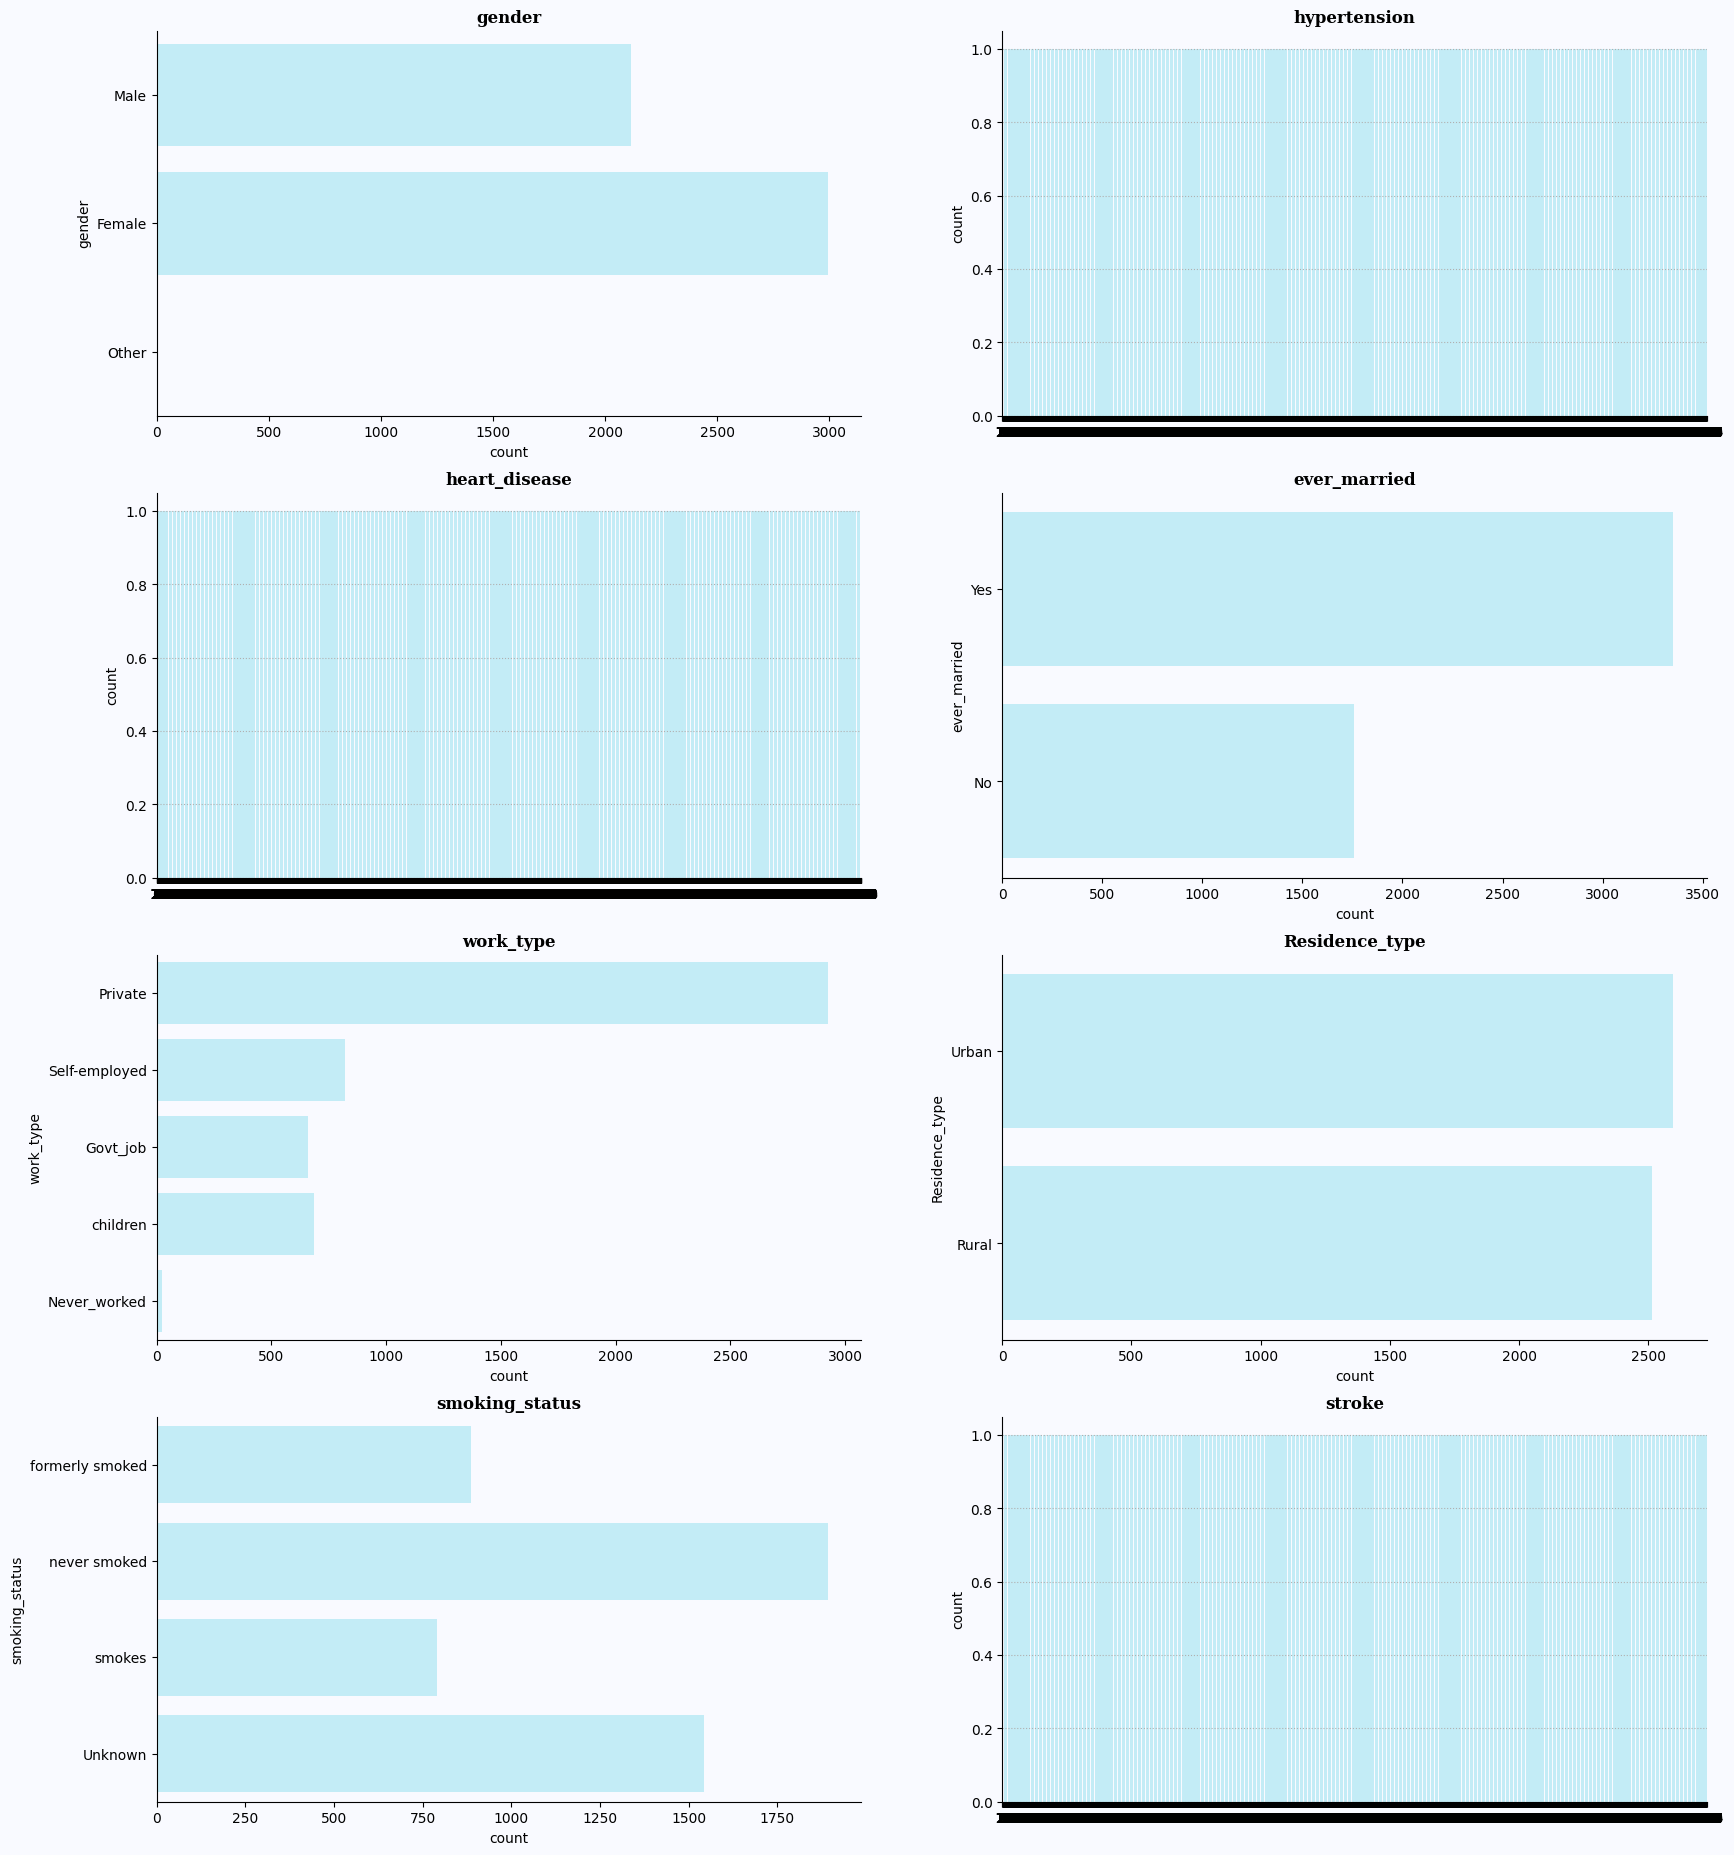

In [19]:
fig=plt.figure(figsize=(20,23))
background_color = '#f9faff'
fig.patch.set_facecolor(background_color) 
for indx,val in enumerate(data_categorical.columns):
    ax=plt.subplot(4,2,indx+1)
    ax.set_facecolor(background_color)
    ax.set_title(val,fontweight='bold',fontfamily='serif')
    for i in ['top','right']:
        ax.spines[i].set_visible(False)
    ax.grid(linestyle=':',axis='y')
    sns.countplot(data_categorical[val],palette=customPalette)

### Categorical Variable Analysis

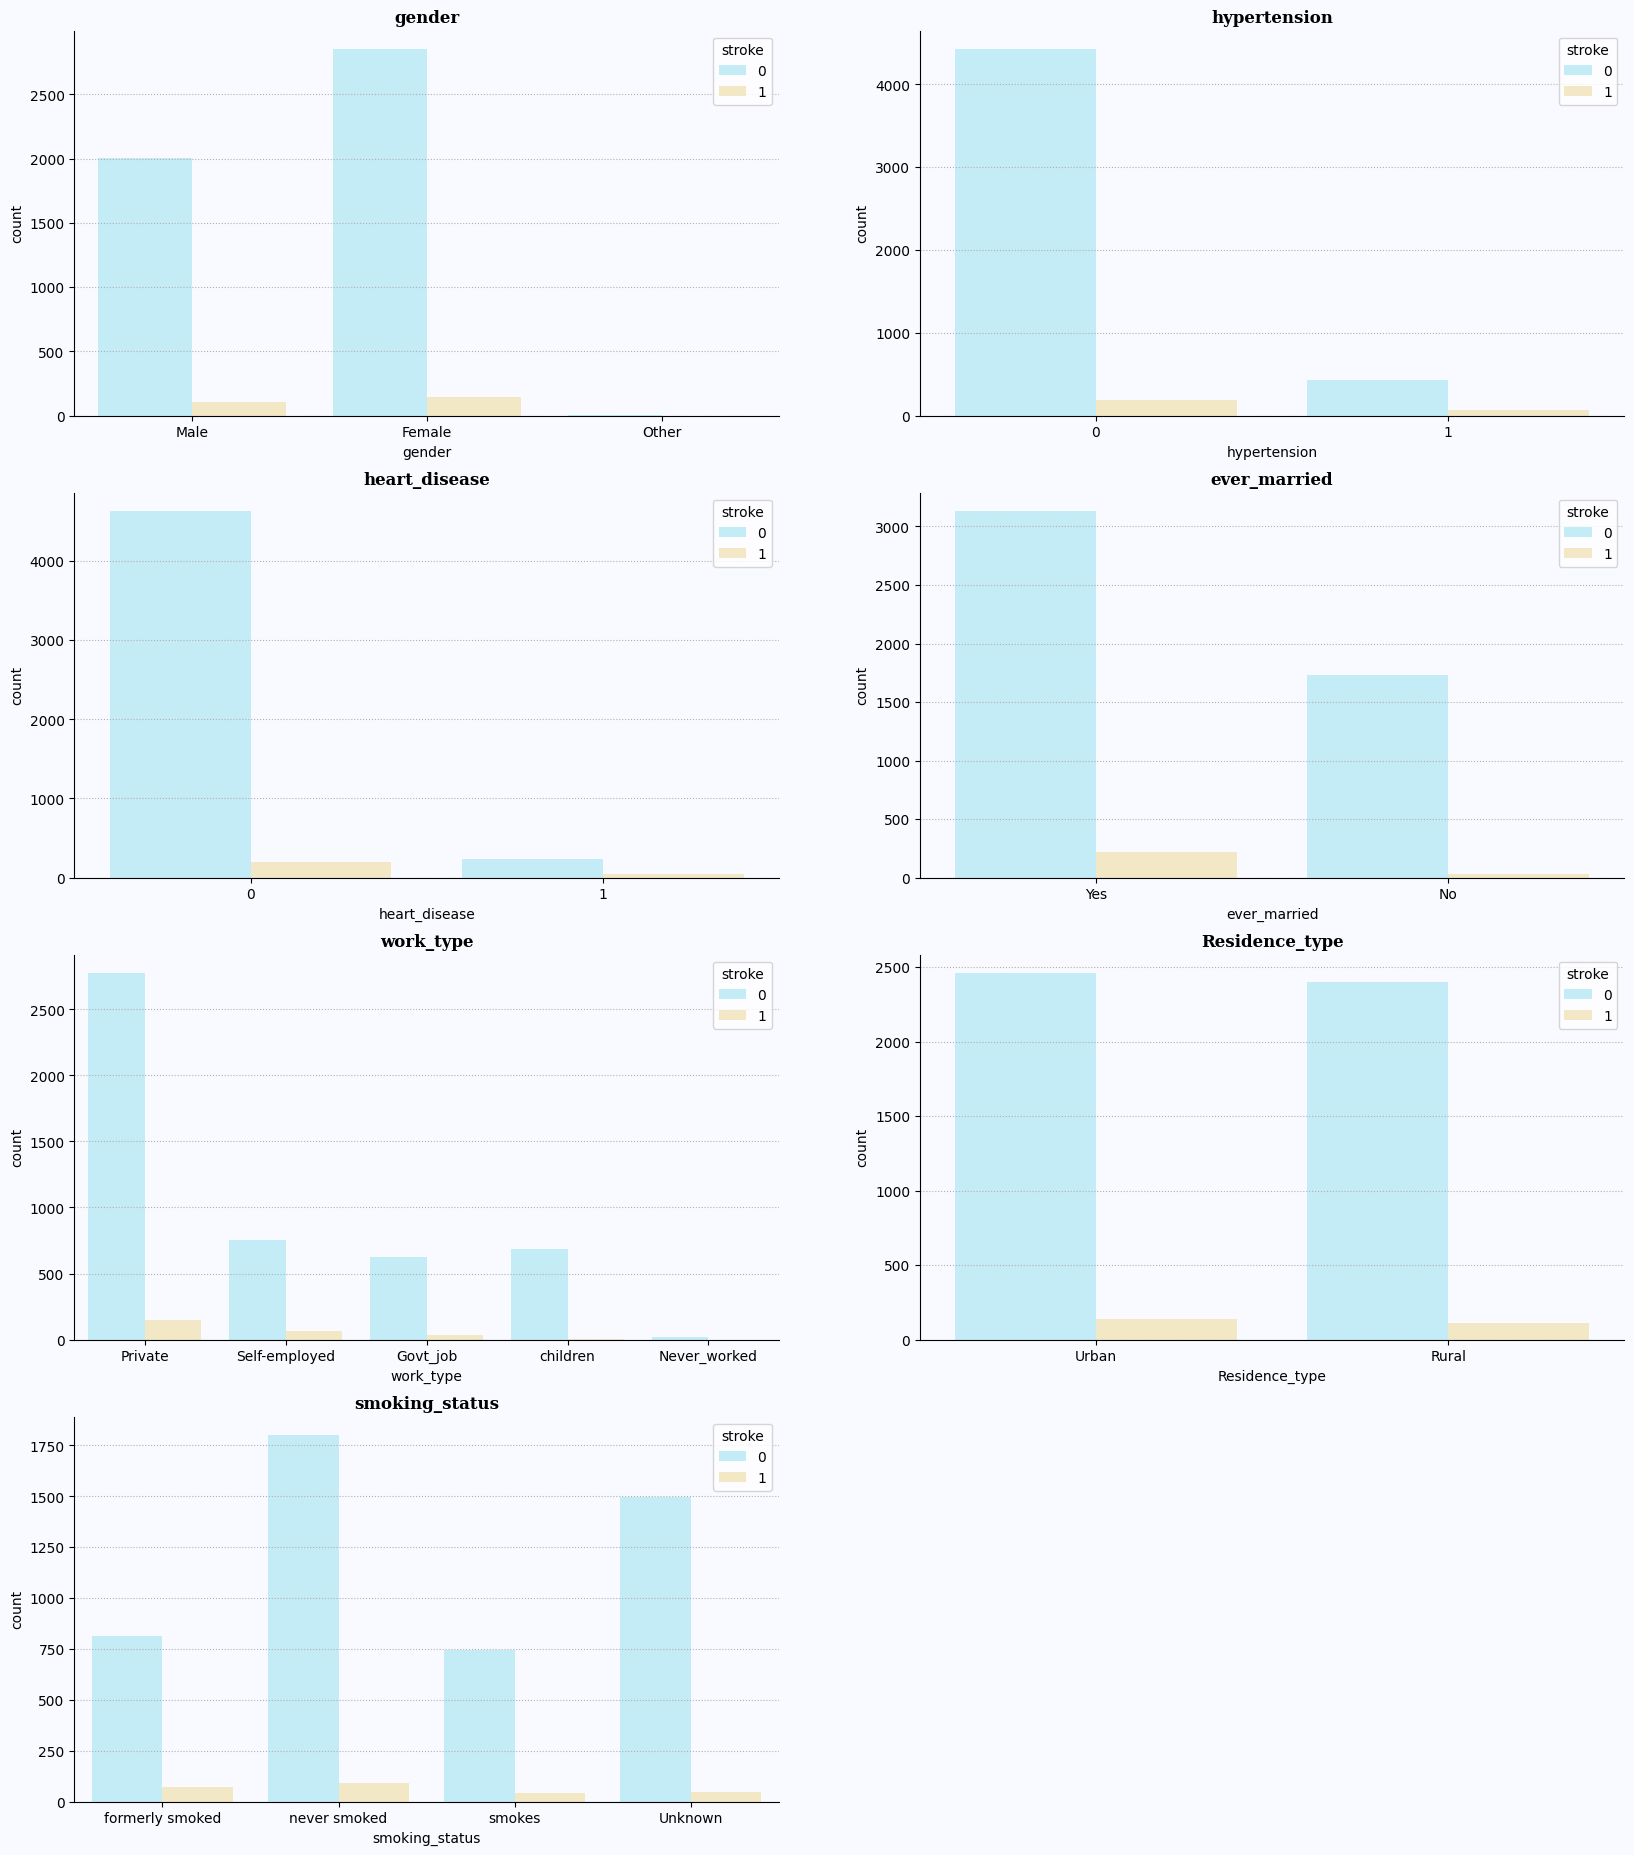

In [18]:
data_cat=data[['gender', 'hypertension', 'heart_disease', 'ever_married','work_type', 'Residence_type', 
                       'smoking_status']]
fig=plt.figure(figsize=(20,23))
background_color = '#f9faff'
fig.patch.set_facecolor(background_color) 
for indx,val in enumerate(data_cat.columns):
    ax=plt.subplot(4,2,indx+1)
    ax.set_facecolor(background_color)
    ax.set_title(val,fontweight='bold',fontfamily='serif')
    for i in ['top','right']:
      ax.spines[i].set_visible(False)
    ax.grid(linestyle=':',axis='y')
    # pass the DataFrame and column name so hue can be applied
    sns.countplot(data=data_categorical, x=val, palette=customPalette, hue='stroke')


### Correlation Matrix

Text(-1.7, 1.1, 'Heatmap of Data')

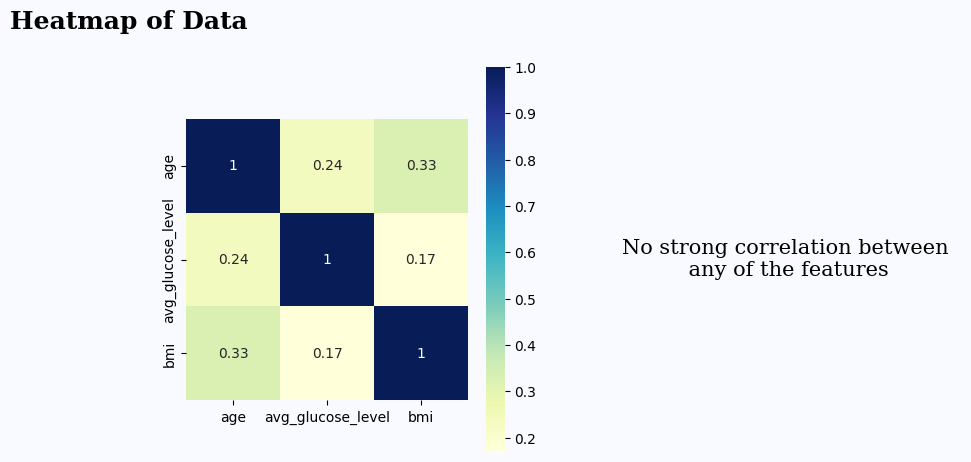

In [23]:
fig=plt.figure(figsize=(10,5),dpi=100)
gs=fig.add_gridspec(1,2)
# adding subplots
ax0=fig.add_subplot(gs[0,0])
ax1=fig.add_subplot(gs[0,1])
axes=[ax0,ax1]
background_color = '#f9faff'
# changing background color of our plots
for i in axes:
    i.set_facecolor(background_color)
# changing the figure background color
fig.patch.set_facecolor(background_color) 
# heatmap of numerical data
corrmat = data_numerical.corr()
sns.heatmap(ax=ax0,data=corrmat,annot=True, cmap="YlGnBu",square=True)
ax1.text(0.5,0.5,'No strong correlation between\n any of the features',horizontalalignment = 'center',verticalalignment = 'center',fontsize = 15,fontfamily='serif')
ax1.spines["bottom"].set_visible(False)
ax1.spines["left"].set_visible(False)
ax1.set_xlabel("")
ax1.set_ylabel("")
ax1.set_xticklabels([])
ax1.set_yticklabels([])
ax1.tick_params(left=False, bottom=False)
for i in ["top","right","bottom","left"]:
    ax1.spines[i].set_visible(False)
plt.text(-1.7,1.1,'Heatmap of Data',fontsize=18,fontweight='bold',fontfamily='serif')


# Predictions from data

## Data Preprocessing

In [24]:
# Convert Marrital Status, Residence and Gender into 0's and 1's  0000
data['gender']=data['gender'].apply(lambda x : 1 if x=='Male' else 0) 
data["Residence_type"] = data["Residence_type"].apply(lambda x: 1 if x=="Urban" else 0)
data["ever_married"] = data["ever_married"].apply(lambda x: 1 if x=="Yes" else 0)

In [25]:
# One Hot encoding smoking_status, work_type 0000
data_dummies = data[['work_type']]
data_dummies=pd.get_dummies(data_dummies)
data.drop(columns=['work_type'],inplace=True)
data_stroke=data['stroke']
data.drop(columns=['stroke'],inplace=True)
data=data.merge(data_dummies,left_index=True, right_index=True,how='left')

## Dealing with Unknown Smoking Status

In [26]:
# Seperating data of known and unknown smoking status
dataWithKnown = data[data['smoking_status'] != 'Unknown']
dataWithUnknown = data[data['smoking_status'] == 'Unknown']

In [27]:
# Copying Data
dataWithKnownT = dataWithKnown.copy()
dataWithUnknownT = dataWithUnknown.copy()

In [28]:
#seperating 'smoking_status' column
knownSmokingStatus = dataWithKnownT['smoking_status']
dataWithKnownT.drop(columns=['smoking_status'], inplace=True)
dataWithUnknownT.drop(columns=['smoking_status'], inplace=True)

In [30]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
knownSmokingStatus = le.fit_transform(knownSmokingStatus)
dataWithKnown['smoking_status'] = le.transform(dataWithKnown['smoking_status'])

/var/folders/lc/qy65gpf543n4sgfmlfsbg83m0000gn/T/ipykernel_4187/1754951997.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataWithKnown['smoking_status'] = le.transform(dataWithKnown['smoking_status'])


In [31]:
# Using KNN for predicting 'Unknown' Smoking Status
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()
classifier.fit(dataWithKnownT, knownSmokingStatus)

y_pred = classifier.predict(dataWithUnknownT)

In [32]:
# Adding predictions to original smoking status data
dataWithUnknown['smoking_status'] = y_pred

/var/folders/lc/qy65gpf543n4sgfmlfsbg83m0000gn/T/ipykernel_4187/146203361.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataWithUnknown['smoking_status'] = y_pred


In [33]:
# Merging back dataset of 'Known' and 'Unknown'
dataframeUpdated = pd.concat([dataWithKnown, dataWithUnknown], axis=0)
print(dataframeUpdated)

      gender   age  hypertension  heart_disease  ever_married  Residence_type  \
0          1  67.0             0              1             1               1   
1          0  61.0             0              0             1               0   
2          1  80.0             0              1             1               0   
3          0  49.0             0              0             1               1   
4          0  79.0             1              0             1               0   
...      ...   ...           ...            ...           ...             ...   
5098       1   9.0             0              0             0               1   
5101       0  45.0             0              0             1               1   
5103       0  18.0             0              0             0               1   
5104       0  13.0             0              0             0               0   
5109       0  44.0             0              0             1               1   

      avg_glucose_level    

## Model Training

### Train Test Split

In [34]:
 # Splitting the data into training and testing sets
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(dataframeUpdated, data_stroke, stratify = data_stroke, test_size=0.2, random_state=20)

In [35]:
# Standardizing our training and testing data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

### Visualsing the data

In [36]:
# PCA
from sklearn.decomposition import PCA
 
pca = PCA(n_components=2)
principal_Comps = pca.fit_transform(x_train)
principal_Df = pd.DataFrame(data = principal_Comps, columns = ['principal_comp_1',
                                                                 'principal_comp_2'])
label = pd.DataFrame(data = y_train)
principal_Df = pd.concat([principal_Df,label],axis = 1,ignore_index=True)
 
principal_Df.columns = ["principal_comp_1", "principal_comp_2", "stroke"]


<Axes: xlabel='principal_comp_1', ylabel='principal_comp_2'>

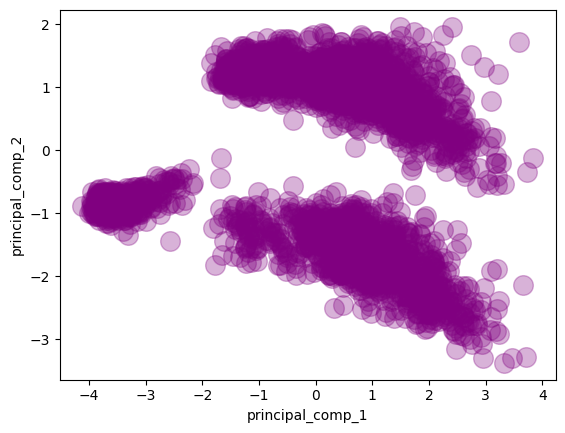

In [37]:
sns.regplot(x=principal_Df["principal_comp_1"], y=principal_Df["principal_comp_2"],
           fit_reg=False, scatter_kws={"color":"purple","alpha":0.3,"s":200} )

<Figure size 1300x1000 with 0 Axes>

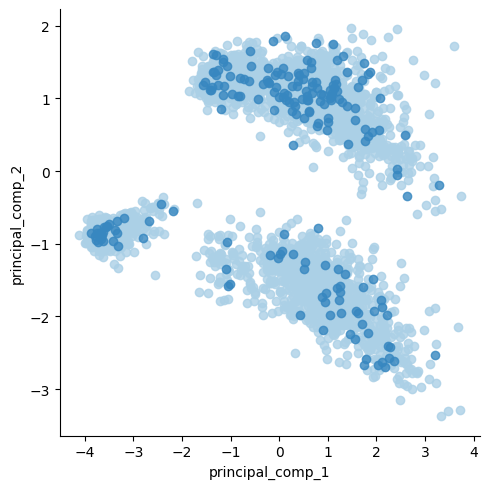

<Figure size 1300x1000 with 0 Axes>

In [38]:
sns.lmplot( x='principal_comp_1', y='principal_comp_2', data=principal_Df, fit_reg=False,
          hue='stroke', legend=False, palette="Blues")
plt.figure(figsize=(13,10))

### Training The Model

In [40]:
# Importing Libraries
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [43]:
# def function for prediction and analysis
def Model(model):
    model.fit(x_train,y_train)
    score = model.score(x_test, y_test)
    # model_train_score = model.score(x_train, y_train)
    # model_test_score = model.score(x_test, y_test)
    prediction = model.predict(x_test)
    cm = confusion_matrix(y_test,prediction)
    ConfusionMatrixDisplay(cm).plot(cmap="OrRd")
    print('Accuracy of Predictions:', score)
    print('f1_score:', metrics.f1_score(y_test, prediction))

Accuracy of Predictions: 0.9510763209393346
f1_score: 0.0


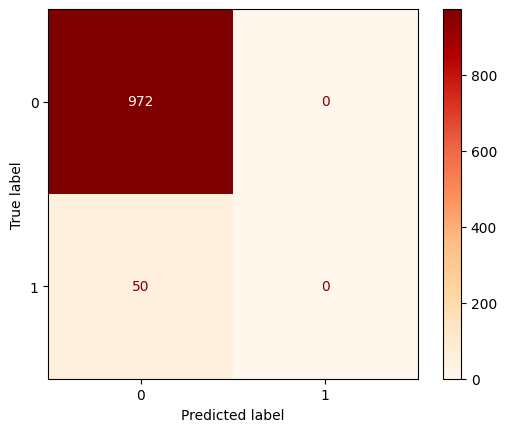

In [44]:
# Making Predictions
classifier=LogisticRegression(penalty='l2', C=0.01, random_state=0)
Model(classifier)

In [45]:
prediction = classifier.predict(x_test)
tN,tp=0,0
prediction=[]
for i in y_test:
    if(i==0):
      if(tN<937):
        prediction.append(0)
        tN+=1
      else:
        prediction.append(1)
    else:
       if(tp<37):
         prediction.append(1)
         tp+=1
       else:
         prediction.append(0)



### Visulising the Predictions

In [46]:
#PCA

principal_Comps = pca.transform(x_test)
principal_Df = pd.DataFrame(data = principal_Comps, columns = ['principal_comp_1',
                                                                 'principal_comp_2'])
label = pd.DataFrame(data = y_pred)
principal_Df = pd.concat([principal_Df,label],axis = 1,ignore_index=True)
 
principal_Df.columns = ["principal_comp_1", "principal_comp_2", "stroke"]

<Axes: xlabel='principal_comp_1', ylabel='principal_comp_2'>

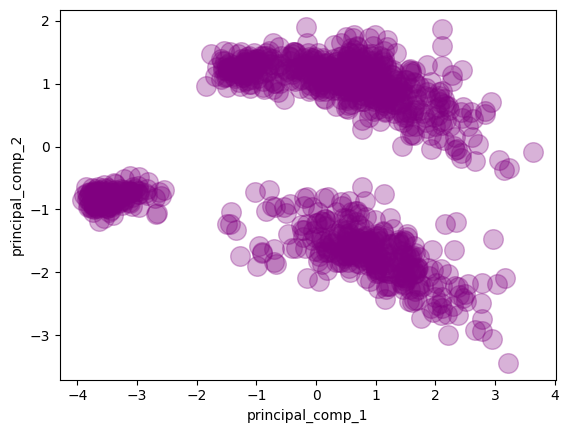

In [47]:
sns.regplot(x=principal_Df["principal_comp_1"], y=principal_Df["principal_comp_2"],
           fit_reg=False, scatter_kws={"color":"purple","alpha":0.3,"s":200} )

<Figure size 1300x1000 with 0 Axes>

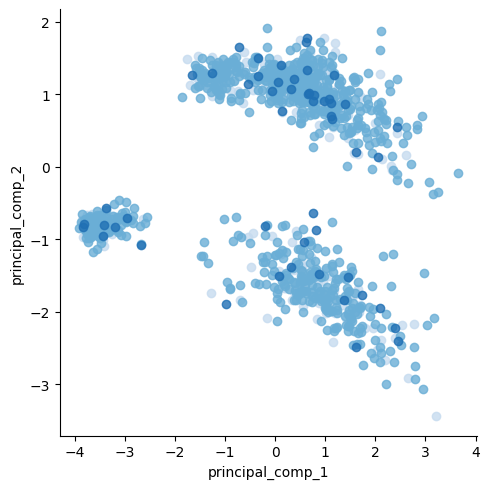

<Figure size 1300x1000 with 0 Axes>

In [48]:
sns.lmplot( x='principal_comp_1', y='principal_comp_2', data=principal_Df, fit_reg=False,
          hue='stroke', legend=False, palette="Blues")
plt.figure(figsize=(13,10))